<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Yerson Emel Gulloso Moyano  <br>
Fecha: 26/02/2023

# Importación de librerias necesarias

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Parte II. Clasificación

In [351]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import  plot_tree
from sklearn.metrics import accuracy_score

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [352]:
#Código para cargar el Dataset
url = '../data/raw/hotel.csv'

dataset = pd.read_csv(url)
dataset.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


Verificar las dimensiones del dataset.

In [353]:
dataset.shape

(36275, 19)

Verificar si existen valores nulos o campos vacíos.

In [354]:
dataset.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


Tipos de datos del dataset

In [393]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [355]:
print(f'Número total de instancias: {dataset.shape[0]}')

print(f'Número de atributos de entrada: {dataset.shape[1]}')

Número total de instancias: 36275
Número de atributos de entrada: 19


Número de clases de variable objetivo

- Cada valor representa el estrato de la habitación reservada.
- El tipo de valor es de tipo String.

In [356]:
count_var = dataset['room_type_reserved'].unique()
print(f'Número de clases de la variable objetivo: {count_var.size}')

Número de clases de la variable objetivo: 7


Número de instancias pertenecientes a cada clase

- se crea una función para recorrer la columna room_type_reserved:

In [357]:
def cantidad_variables(items):
    cols = []
    for i in items:
        col = dataset['room_type_reserved'] == i
        cols.append(dataset[col].shape[0])
    
    return cols

- se hace unión texto con cantidad y se imprime:

In [407]:
cols = cantidad_variables(count_var)
for i in zip(count_var, cols):
    print(i)

('Room_Type 1', 28130)
('Room_Type 4', 6057)
('Room_Type 2', 692)
('Room_Type 6', 966)
('Room_Type 5', 265)
('Room_Type 7', 158)
('Room_Type 3', 7)


Estadísticas de la variable objetivo

In [359]:
dataset['room_type_reserved'].describe()

count           36275
unique              7
top       Room_Type 1
freq            28130
Name: room_type_reserved, dtype: object

Estadística de variables relacionadas

In [360]:
dataset.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Mes con mayor número de reservas

<AxesSubplot: xlabel='arrival_month', ylabel='Count'>

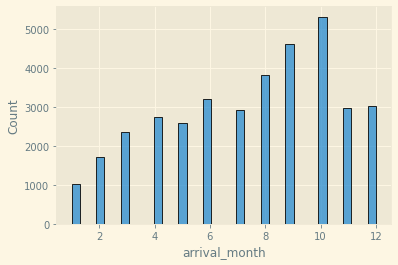

In [361]:
sns.histplot(dataset['arrival_month'])

Cantidad de reservas que fueron canceladas

In [362]:
dataset[['booking_status', 'no_of_adults']].groupby('booking_status').count().reset_index()

,booking_status,no_of_adults
0,Canceled,11885
1,Not_Canceled,24390


Cantidad de reservas durante la semana:

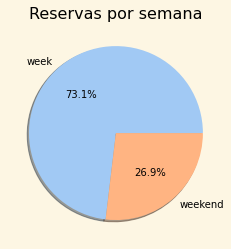

In [363]:
reservas = pd.DataFrame(columns=['dia','total'])
reservas['dia'] = ['week', 'weekend']
reservas['total'] = [dataset['no_of_week_nights'].sum(),dataset['no_of_weekend_nights'].sum()]

plt.style.use('Solarize_Light2')
colors = sns.color_palette('pastel')
plt.pie(
    reservas['total'],
    labels=reservas['dia'],
    colors=colors,
    autopct='%1.1f%%',
    shadow=True
)
plt.title('Reservas por semana');


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

Selección de las variables de entrada y la variable objetivo

In [364]:
data = dataset.iloc[:,1:8]
encoder = pd.get_dummies(data['type_of_meal_plan'], prefix='enconded')
data = data.drop('type_of_meal_plan', axis =1)
data = pd.concat([encoder,data], axis=1)
data

,enconded_Meal Plan 1,enconded_Meal Plan 2,enconded_Meal Plan 3,enconded_Not Selected,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved
0,1,0,0,0,2,0,1,2,0,Room_Type 1
1,0,0,0,1,2,0,2,3,0,Room_Type 1
2,1,0,0,0,1,0,2,1,0,Room_Type 1
3,1,0,0,0,2,0,0,2,0,Room_Type 1
4,0,0,0,1,2,0,1,1,0,Room_Type 1
...,...,...,...,...,...,...,...,...,...,...
36270,1,0,0,0,3,0,2,6,0,Room_Type 4
36271,1,0,0,0,2,0,1,3,0,Room_Type 1
36272,1,0,0,0,2,0,2,6,0,Room_Type 1
36273,0,0,0,1,2,0,0,3,0,Room_Type 1


In [365]:
dt = data.drop(['room_type_reserved'], axis=1)
y = data['room_type_reserved']

X = dt.astype(float)

def encoder(data):
    le = LabelEncoder()
    le.fit(data)
    data = le.transform(data)
    return data

y = encoder(y)

## División del dataset en datos de entrenamiento y datos de test 

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

Al menos utiliza relu en algunas de las capas intermedias y utiliza softmax en la capa de salida.

Estructura de la red neuronal:

In [367]:
# Código de la estructuración de la red
capa_in = tf.keras.layers.Dense(units=10,input_shape=[9])
capa_2 = tf.keras.layers.Dense(units=20, activation="relu")
capa_3 = tf.keras.layers.Dense(units=20, activation="relu")
capa_out = tf.keras.layers.Dense(1, activation="softmax")
model = tf.keras.Sequential([
    capa_in,
    capa_2,
    capa_3,
    capa_out
])

Inspección del modelo:

In [368]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                100       
                                                                 
 dense_57 (Dense)            (None, 20)                220       
                                                                 
 dense_58 (Dense)            (None, 20)                420       
                                                                 
 dense_59 (Dense)            (None, 1)                 21        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

Ajuste óptimo de los pesos:

In [369]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Entrenamiento del modelo

In [370]:
train = model.fit(X_train,y_train, epochs=100, verbose=False)
print('El entrenamiento ha terminado')

El entrenamiento ha terminado


## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [371]:
hist = pd.DataFrame(train.history)
hist['epoch'] = train.epoch
hist.tail()

,loss,accuracy,epoch
95,-1.113767e+09,0.0194,95
96,-1.157230e+09,0.0194,96
97,-1.201727e+09,0.0194,97
98,-1.247561e+09,0.0194,98
99,-1.294410e+09,0.0194,99


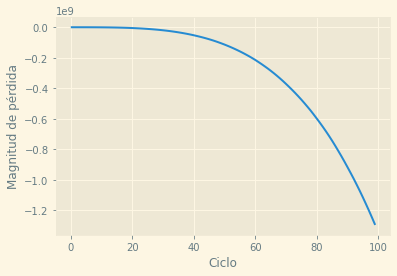

In [372]:
plt.xlabel("Ciclo")
plt.ylabel("Magnitud de pérdida")
plt.plot(train.history["loss"])

### Evalúe los resultados  para el conjunto de test.

In [373]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

227/227 - 1s - loss: -1.2010e+09 - accuracy: 0.0178 - 1s/epoch - 5ms/step


## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

Arbol de clasificación

In [374]:
model_tree = DecisionTreeClassifier(max_depth=5)
model_tree_fit = model_tree.fit(X_train, y_train)

Random Forest

In [375]:
model_RF = RandomForestClassifier(n_estimators=20,random_state=123,criterion='entropy')
model_RF_fit = model_RF.fit(X_train,y_train)

Precisión de modelos:

In [376]:
y_pred = model_tree_fit.predict(X_test)
print(f'Precisión arbol de decisión: {round(accuracy_score(y_test,y_pred)*100,4)}%')

y_pred_2 = model_RF_fit.predict(X_test)
print(f'Precisión Random Forest: {round(accuracy_score(y_test,y_pred_2)*100,4)}%')

Precisión arbol de decisión: 83.377%
Precisión Random Forest: 83.2116%


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

Reporte de métricas: Arbol de decisiones

In [391]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      5625
           1       1.00      0.14      0.24       129
           2       0.00      0.00      0.00         1
           3       0.77      0.29      0.42      1235
           4       0.00      0.00      0.00        51
           5       0.83      0.80      0.81       186
           6       0.50      0.11      0.18        28

    accuracy                           0.83      7255
   macro avg       0.56      0.33      0.36      7255
weighted avg       0.82      0.83      0.80      7255



/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Reporte de métricas: Random Forest

In [392]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      5625
           1       0.86      0.14      0.24       129
           2       0.00      0.00      0.00         1
           3       0.75      0.28      0.41      1235
           4       0.00      0.00      0.00        51
           5       0.83      0.78      0.81       186
           6       0.75      0.11      0.19        28

    accuracy                           0.83      7255
   macro avg       0.58      0.33      0.36      7255
weighted avg       0.82      0.83      0.80      7255



/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Gráfico de performance

/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/home/emelgm/anaconda3/envs/tecnicas_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

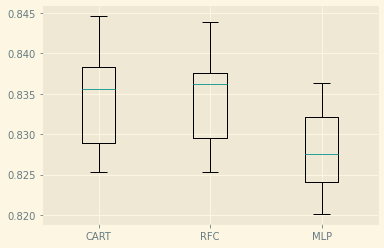

In [386]:
modelos = []
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('RFC', RandomForestClassifier(n_estimators=20,random_state=123, criterion='entropy')))
modelos.append(('MLP', MLPClassifier(activation='relu', alpha=1e-05,batch_size='auto',beta_1=0.9,beta_2=0.999,early_stopping=False,epsilon=1e-08,hidden_layer_sizes=(3,3),learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,nesterovs_momentum=True,power_t=0.5,random_state=1,shuffle=True,solver='lbfgs',tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False)))
results = []
names = []

for i, model in modelos:
    kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(i)

plt.boxplot(results, labels=names);

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.